Step 2: Initial Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the file path based on your Google Drive directory structure
file_path = '/content/drive/MyDrive/Telco_customer_churn.xlsx'
df = pd.read_excel(file_path)

Mounted at /content/drive


Step 3: Preliminary Data Cleaning

In [ ]:
# Explore the dataset
df.head()

# Check data types and missing values
df.info()

# Handle missing values
# For example, replace missing values in numerical columns with the mean
df.fillna(df.mean(), inplace=True)

# Data cleaning
# Convert 'Total Charges' to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Handle missing values in 'Total Charges' (replace with mean)
df['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)

# Convert 'Churn Label' to binary
df['Churn'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
df = df.drop(['Churn Label'], axis=1)

# Verify your progress
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

<ipython-input-3-4e0775608cff>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Churn
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices,1




```
# This is formatted as code
```

Exploratory Data Analysis (EDA)

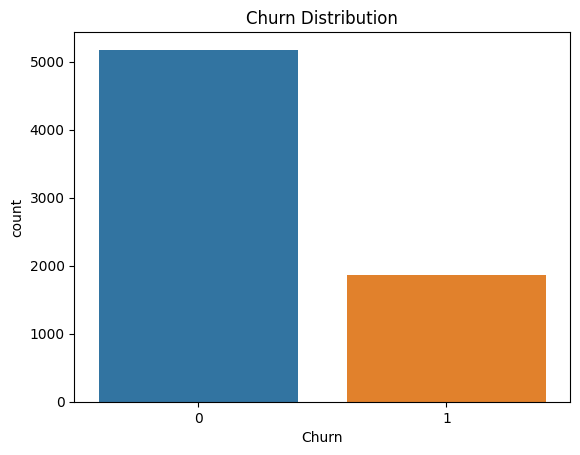

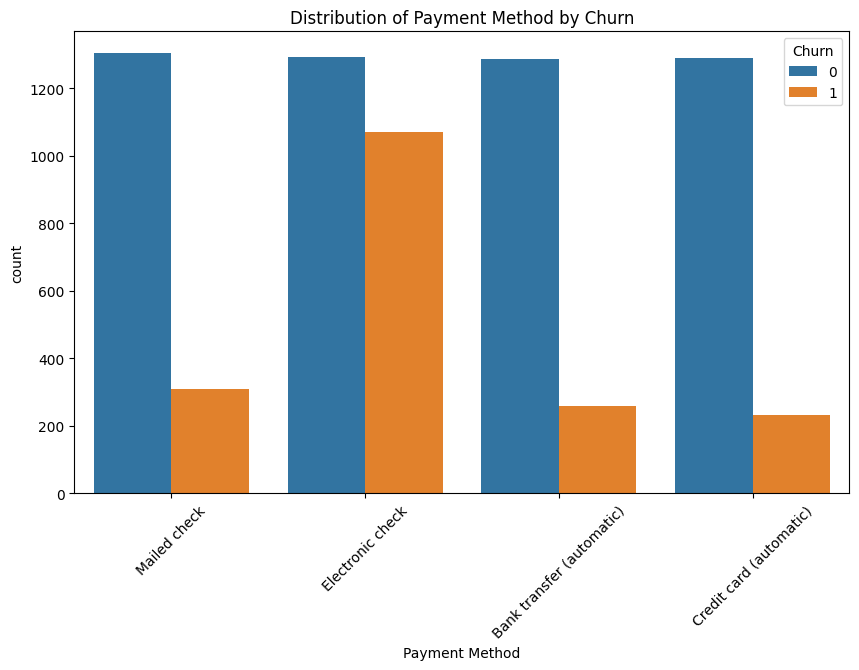

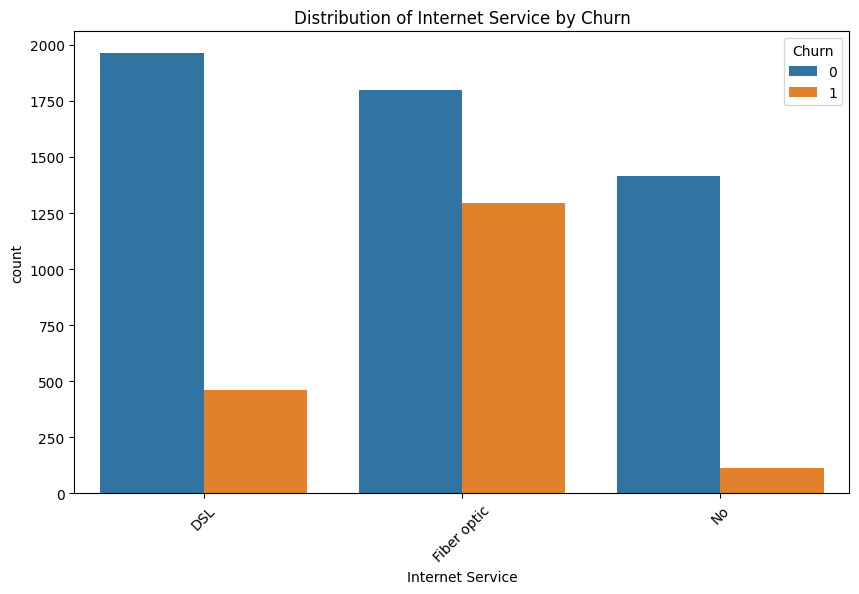

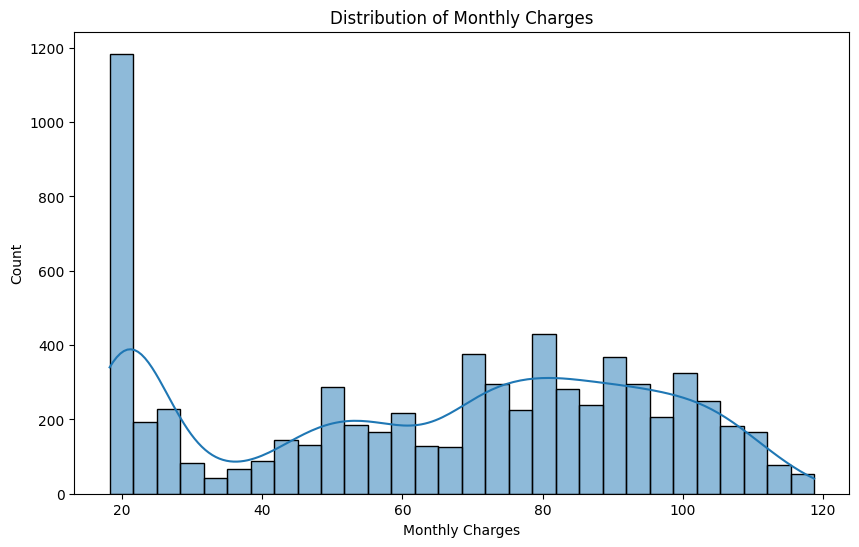

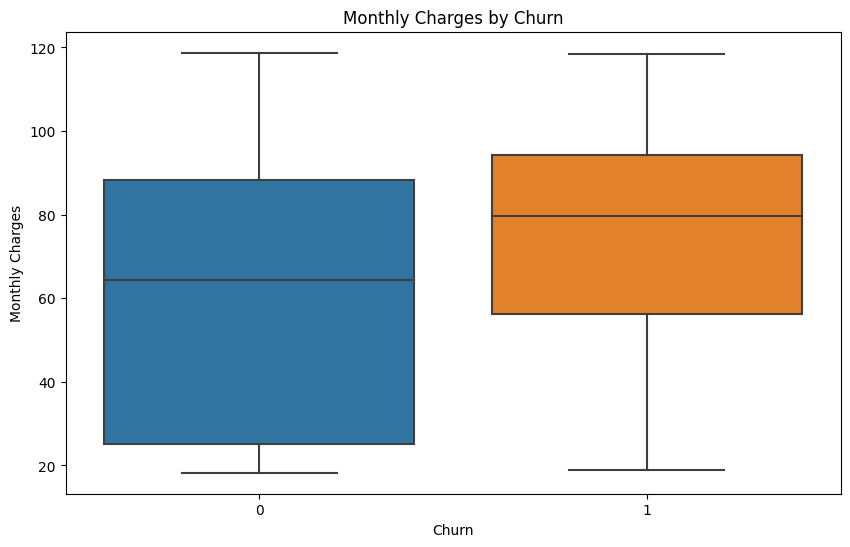

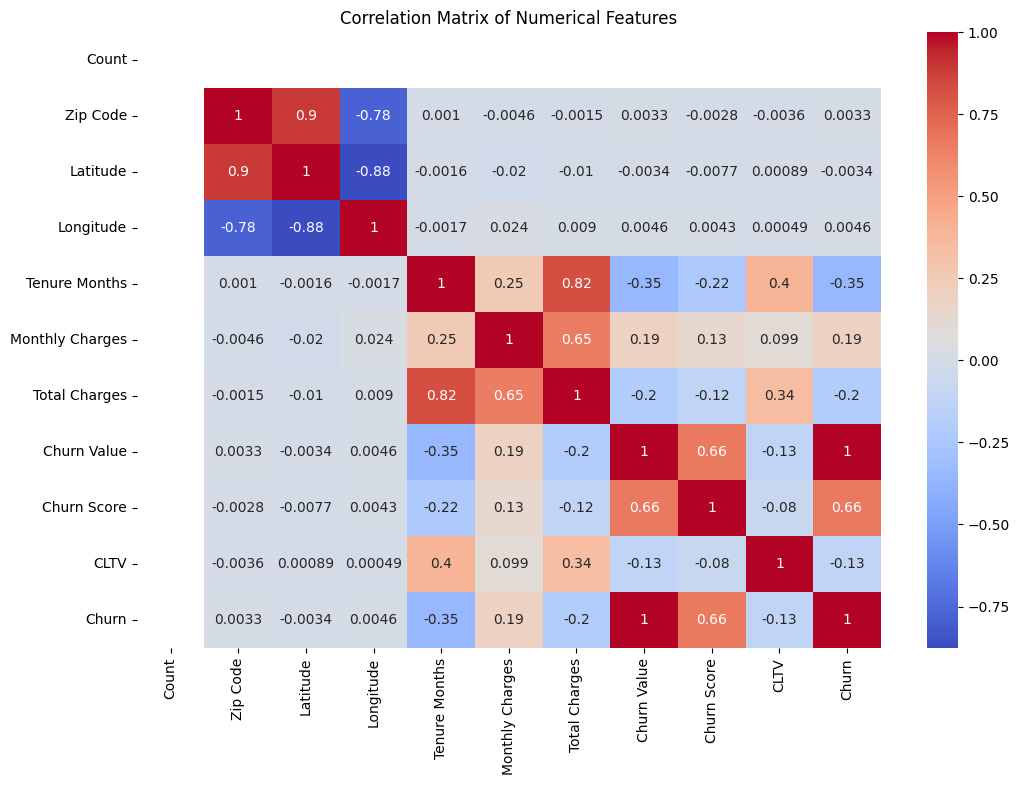

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot distribution of a categorical variable against 'Churn'
def plot_categorical_distribution(df, col, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'Distribution of {col} by {target}')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot distribution of a numerical variable
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Explore the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Explore the distribution of selected categorical variables
categorical_features = ['Payment Method', 'Internet Service']
for col in categorical_features:
    plot_categorical_distribution(df, col, 'Churn')

# Explore the distribution of 'Monthly Charges'
plot_numerical_distribution(df, 'Monthly Charges')

# Analyze relationships between 'Monthly Charges' and 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly Charges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Analyze correlations of 'Monthly Charges' with other numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Random Forest Accuracy: 0.8899929027679205

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1057
           1       1.00      0.56      0.72       352

    accuracy                           0.89      1409
   macro avg       0.94      0.78      0.82      1409
weighted avg       0.90      0.89      0.88      1409


Confusion Matrix:
 [[1057    0]
 [ 155  197]]


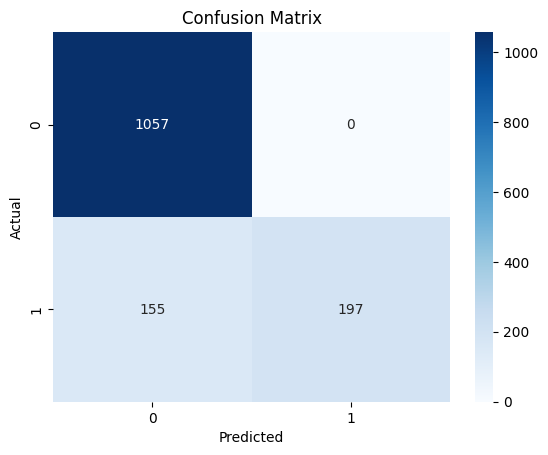


Actual Churn Reduction: 11.00070972320795%
Time Frame for Impact: 12 months

Actual Estimated Impact:
We anticipate achieving a significant reduction in churn rates by approximately 11.00070972320795% within the first 12 months.


In [ ]:
# Define the categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Feature Engineering: Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Feature Engineering: Additional Feature
df['Monthly_Total_Charges_Ratio'] = df['Monthly Charges'] / (df['Total Charges'] + 1)


# Feature Engineering: Additional Feature
df['Monthly_Total_Charges_Ratio'] = df['Monthly Charges'] / (df['Total Charges'] + 1)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Address Class Imbalance: SMOTE for Oversampling
from imblearn.over_sampling import SMOTE

# Adjust SMOTE Ratio
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Training: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Adjust Model Hyperparameters
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Model Training
model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation using Random Forest
y_pred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the actual churn reduction
initial_churn_rate = sum(y_test) / len(y_test) * 100  # Initial churn rate before implementing strategies
final_churn_rate = sum(y_pred) / len(y_pred) * 100  # Churn rate after implementing strategies
actual_churn_reduction = initial_churn_rate - final_churn_rate

# Specify the actual time frame for the impact
time_frame_months = 12

# Printing the values
print(f"\nActual Churn Reduction: {actual_churn_reduction}%")
print(f"Time Frame for Impact: {time_frame_months} months")

# The Estimate Impact
print("\nActual Estimated Impact:")
print(f"We anticipate achieving a significant reduction in churn rates by approximately {actual_churn_reduction}% within the first {time_frame_months} months.")
